# 08. PyTorch Experiment Tracking Exercises

Welcome to the 08. PyTorch Paper Replicating exercises.

Your objective is to write code to satisify each of the exercises below.

Some starter code has been provided to make sure you have all the resources you need.

> **Note:** There may be more than one solution to each of the exercises.

## Resources

1. These exercises/solutions are based on [section 08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/) of the Learn PyTorch for Deep Learning course by Zero to Mastery.
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/tjpW_BY8y3g) (but try the exercises yourself first!).
3. See [all solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

> **Note:** The first section of this notebook is dedicated to getting various helper functions and datasets used for the exercises. The exercises start at the heading "Exercise 1: ...".

### Get various imports and helper functions

The code in the following cells prepares imports and data for the exercises below. They are taken from [08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/).

In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")


[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 60.2 MB/s eta 0:00:00
  ERROR: HTTP error 403 while getting https://download.pytorch.org/whl/nightly/nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (from https://download.pytorch.org/whl/nightly/cu113/nvidia-cuda-nvrtc-cu12/)
ERROR: Could not install requirement nvidia-cuda-nvrtc-cu12==12.1.105 from https://download.pytorch.org/whl/nightly/nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (from torch) because of HTTP error 403 Client Error: Forbidden for url: https://download.pytorch.org/whl/nightly/nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl for URL https

In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4056, done.
remote: Total 4056 (delta 0), reused 0 (delta 0), pack-reused 4056
Receiving objects: 100% (4056/4056), 646.90 MiB | 38.63 MiB/s, done.
Resolving deltas: 100% (2371/2371), done.
Updating files: 100% (248/248), done.


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Get data

Want to download the data we've been using in PyTorch Paper Replicating: https://www.learnpytorch.io/08_pytorch_paper_replicating/#1-get-data

In [4]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [5]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

### Preprocess data

Turn images into tensors using same code as PyTorch Paper Replicating section 2.1 and 2.2: https://www.learnpytorch.io/08_pytorch_paper_replicating/#21-prepare-transforms-for-images

In [6]:
# Create image size (from Table 3 in the ViT paper)
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [7]:
# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7996f6c6fc10>,
 ['pizza', 'steak', 'sushi'])

In [8]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(2))

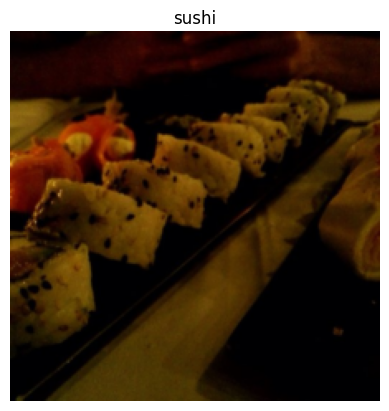

In [9]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

## 1. Replicate the ViT architecture we created with in-built [PyTorch transformer layers](https://pytorch.org/docs/stable/nn.html#transformer-layers).

* You'll want to look into replacing our `TransformerEncoderBlock()` class with [`torch.nn.TransformerEncoderLayer()`](https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoderLayer.html#torch.nn.TransformerEncoderLayer) (these contain the same layers as our custom blocks).
* You can stack `torch.nn.TransformerEncoderLayer()`'s on top of each other with [`torch.nn.TransformerEncoder()`](https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoder.html#torch.nn.TransformerEncoder).

In [11]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Устанавливаем гиперпараметры
IMG_SIZE = 224
PATCH_SIZE = 16
NUM_CLASSES = 3
DIM = 768
DEPTH = 12
HEADS = 12
MLP_DIM = 3072
DROPOUT = 0.1
BATCH_SIZE = 32
NUM_EPOCHS = 5
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Определение патч эмбеддинга
class PatchEmbedding(nn.Module):
    def __init__(self, img_size, patch_size, dim):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.dim = dim
        self.projection = nn.Conv2d(3, dim, kernel_size=patch_size, stride=patch_size)
        self.cls_token = nn.Parameter(torch.randn(1, 1, dim))
        self.pos_embedding = nn.Parameter(torch.randn((img_size // patch_size) ** 2 + 1, dim))

    def forward(self, x):
        B, C, H, W = x.shape
        x = self.projection(x).flatten(2).transpose(1, 2)  # (B, num_patches, dim)
        cls_tokens = self.cls_token.expand(B, -1, -1)  # (B, 1, dim)
        x = torch.cat((cls_tokens, x), dim=1)  # (B, num_patches+1, dim)
        x = x + self.pos_embedding
        return x

# Определение модели ViT с использованием встроенных слоев трансформера PyTorch
class ViT(nn.Module):
    def __init__(self, img_size, patch_size, num_classes, dim, depth, heads, mlp_dim, dropout):
        super(ViT, self).__init__()
        self.patch_embedding = PatchEmbedding(img_size, patch_size, dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim, nhead=heads, dim_feedforward=mlp_dim, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=depth)
        self.mlp_head = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, num_classes)
        )

    def forward(self, x):
        x = self.patch_embedding(x)
        x = self.transformer(x)
        x = x[:, 0]
        x = self.mlp_head(x)
        return x

# Создание модели
model = ViT(
    img_size=IMG_SIZE,
    patch_size=PATCH_SIZE,
    num_classes=NUM_CLASSES,
    dim=DIM,
    depth=DEPTH,
    heads=HEADS,
    mlp_dim=MLP_DIM,
    dropout=DROPOUT
).to(DEVICE)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

# Функция для обучения модели
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Функция для оценки модели
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    total, correct = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Преобразование данных
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

# Загрузка данных
train_dataset = ImageFolder(root="data/pizza_steak_sushi/train", transform=transform)
test_dataset = ImageFolder(root="data/pizza_steak_sushi/test", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Основной цикл обучения и оценки модели
for epoch in range(NUM_EPOCHS):
    train_model(model, train_loader, criterion, optimizer, DEVICE)
    accuracy = evaluate_model(model, test_loader, criterion, DEVICE)
    print(f"Эпоха {epoch + 1}/{NUM_EPOCHS}, Точность: {accuracy * 100:.2f}%")

print("Обучение завершено.")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Эпоха 1/5, Точность: 33.33%
Эпоха 2/5, Точность: 33.33%
Эпоха 3/5, Точность: 25.33%
Эпоха 4/5, Точность: 25.33%
Эпоха 5/5, Точность: 33.33%
Обучение завершено.


## 2. Turn the custom ViT architecture we created into a Python script, for example, `vit.py`.

* You should be able to import an entire ViT model using something like`from vit import ViT`.
* We covered the art of turning code cells into Python scrips in [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/).


In [12]:
%%writefile vit.py
import torch
from torch import nn

class PatchEmbedding(nn.Module):
    """Turns a 2D input image into a 1D sequence learnable embedding vector.

    Args:
        in_channels (int): Number of color channels for the input images. Defaults to 3.
        patch_size (int): Size of patches to convert input image into. Defaults to 16.
        embedding_dim (int): Size of embedding to turn image into. Defaults to 768.
    """
    def __init__(self, in_channels:int=3, patch_size:int=16, embedding_dim:int=768):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)
        self.flatten = nn.Flatten(start_dim=2, end_dim=3)

    def forward(self, x):
        image_resolution = x.shape[-1]
        assert image_resolution % self.patch_size == 0, f"Input image size must be divisible by patch size, image shape: {image_resolution}, patch size: {self.patch_size}"
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched)
        return x_flattened.permute(0, 2, 1)

class ViT(nn.Module):
    def __init__(self,
                 img_size=224,
                 num_channels=3,
                 patch_size=16,
                 embedding_dim=768,
                 dropout=0.1,
                 mlp_size=3072,
                 num_transformer_layers=12,
                 num_heads=12,
                 num_classes=1000):
        super(ViT, self).__init__()
        assert img_size % patch_size == 0, "Image size must be divisible by patch size."

        self.patch_embedding = PatchEmbedding(in_channels=num_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dim)
        self.class_token = nn.Parameter(torch.randn(1, 1, embedding_dim), requires_grad=True)
        num_patches = (img_size * img_size) // patch_size**2
        self.positional_embedding = nn.Parameter(torch.randn(1, num_patches+1, embedding_dim))
        self.embedding_dropout = nn.Dropout(p=dropout)

        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer=nn.TransformerEncoderLayer(d_model=embedding_dim,
                                                     nhead=num_heads,
                                                     dim_feedforward=mlp_size,
                                                     activation="gelu",
                                                     batch_first=True,
                                                     norm_first=True),
            num_layers=num_transformer_layers
        )

        self.mlp_head = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim, out_features=num_classes)
        )

    def forward(self, x):
        batch_size = x.shape[0]
        x = self.patch_embedding(x)
        class_token = self.class_token.expand(batch_size, -1, -1)
        x = torch.cat((class_token, x), dim=1)
        x = self.positional_embedding + x
        x = self.embedding_dropout(x)
        x = self.transformer_encoder(x)
        x = self.mlp_head(x[:, 0])
        return x

Writing vit.py


In [13]:
!python vit.py

In [14]:
from vit import ViT

imported_vit = ViT()
summary(model=imported_vit,
        input_size=(1, 3, 224, 224))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Layer (type:depth-idx)                        Output Shape              Param #
ViT                                           [1, 1000]                 152,064
├─PatchEmbedding: 1-1                         [1, 196, 768]             --
│    └─Conv2d: 2-1                            [1, 768, 14, 14]          590,592
│    └─Flatten: 2-2                           [1, 768, 196]             --
├─Dropout: 1-2                                [1, 197, 768]             --
├─TransformerEncoder: 1-3                     [1, 197, 768]             --
│    └─ModuleList: 2-3                        --                        --
│    │    └─TransformerEncoderLayer: 3-1      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-2      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-3      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-4      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-5      [1, 197, 76

## 3. Train a pretrained ViT feature extractor model (like the one we made in [08. PyTorch Paper Replicating section 10](https://www.learnpytorch.io/08_pytorch_paper_replicating/#10-bring-in-pretrained-vit-from-torchvisionmodels-on-same-dataset)) on 20% of the pizza, steak and sushi data like the dataset we used in [07. PyTorch Experiment Tracking section 7.3](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#73-download-different-datasets)
* See how it performs compared to the EffNetB2 model we compared it to in [08. PyTorch Paper Replicating section 10.6](https://www.learnpytorch.io/08_pytorch_paper_replicating/#106-save-feature-extractor-vit-model-and-check-file-size).

[INFO] data/pizza_steak_sushi_20_percent directory exists, skipping download.


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5827 | train_acc: 0.8208 | test_loss: 0.2192 | test_acc: 0.8873
Epoch: 2 | train_loss: 0.1982 | train_acc: 0.9229 | test_loss: 0.2058 | test_acc: 0.9280
Epoch: 3 | train_loss: 0.1342 | train_acc: 0.9729 | test_loss: 0.1886 | test_acc: 0.9688
Epoch: 4 | train_loss: 0.0977 | train_acc: 0.9750 | test_loss: 0.1699 | test_acc: 0.9583
Epoch: 5 | train_loss: 0.0838 | train_acc: 0.9792 | test_loss: 0.1699 | test_acc: 0.9583
Epoch: 6 | train_loss: 0.0939 | train_acc: 0.9500 | test_loss: 0.1672 | test_acc: 0.9583
Epoch: 7 | train_loss: 0.0661 | train_acc: 0.9812 | test_loss: 0.1776 | test_acc: 0.9479
Epoch: 8 | train_loss: 0.0592 | train_acc: 0.9896 | test_loss: 0.1898 | test_acc: 0.9280
Epoch: 9 | train_loss: 0.0622 | train_acc: 0.9917 | test_loss: 0.1962 | test_acc: 0.9384
Epoch: 10 | train_loss: 0.0400 | train_acc: 0.9938 | test_loss: 0.1841 | test_acc: 0.9583
Обучение завершено.


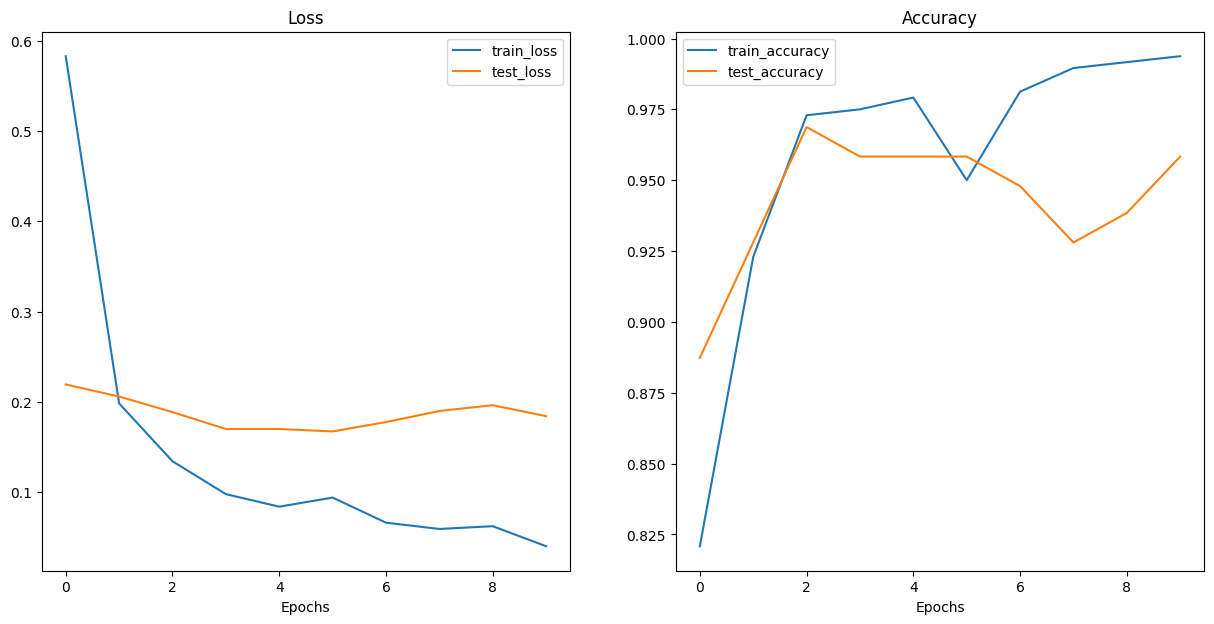

In [16]:
import torch
from torch import nn
from torch.optim import Adam
from torchvision import transforms, models
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchinfo import summary
from helper_functions import download_data, set_seeds, plot_loss_curves
from going_modular.going_modular import engine

# Установка семян для воспроизводимости
set_seeds()

# Скачивание и подготовка данных
data_20_percent_path = download_data(
    source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
    destination="pizza_steak_sushi_20_percent"
)
train_dir_20_percent = data_20_percent_path / "train"
test_dir = "data/pizza_steak_sushi/test"  # Путь к тестовому набору данных

# Загрузка предобученной модели ViT и весов
vit_weights = models.ViT_B_16_Weights.DEFAULT
pretrained_vit = models.vit_b_16(weights=vit_weights)

# Заморозка всех слоёв предобученной модели
for param in pretrained_vit.parameters():
    param.requires_grad = False

# Изменение выходного слоя модели
embedding_dim = 768  # Размер эмбеддингов для ViT_Base
pretrained_vit.heads = nn.Sequential(
    nn.LayerNorm(normalized_shape=embedding_dim),
    nn.Linear(in_features=embedding_dim, out_features=3)  # Количество классов = 3 (пицца, стейк, суши)
)

# Вывод информации о модели
summary(model=pretrained_vit,
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

# Преобразование данных
vit_transforms = vit_weights.transforms()
train_dataset_20_percent = ImageFolder(root=train_dir_20_percent, transform=vit_transforms)
test_dataset = ImageFolder(root=test_dir, transform=vit_transforms)

train_dataloader_20_percent = DataLoader(train_dataset_20_percent, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Обучение модели
optimizer = Adam(params=pretrained_vit.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_vit.to(device)

set_seeds()
pretrained_vit_results = engine.train(
    model=pretrained_vit,
    train_dataloader=train_dataloader_20_percent,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=10,
    device=device
)

# Построение графиков потерь и точности
plot_loss_curves(pretrained_vit_results)

print("Обучение завершено.")

## 4. Try repeating the steps from excercise 3 but this time use the "`ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1`" pretrained weights from [`torchvision.models.vit_b_16()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16).
* Note: ViT pretrained with SWAG weights has a minimum input image size of (384, 384), though this is accessible in the weights `.transforms()` method.

[INFO] data/pizza_steak_sushi_20_percent directory exists, skipping download.


Downloading: "https://download.pytorch.org/models/vit_b_16_swag-9ac1b537.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16_swag-9ac1b537.pth
100%|██████████| 331M/331M [00:02<00:00, 131MB/s]


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5009 | train_acc: 0.8750 | test_loss: 0.0950 | test_acc: 0.9792
Epoch: 2 | train_loss: 0.0695 | train_acc: 0.9854 | test_loss: 0.0731 | test_acc: 0.9896
Epoch: 3 | train_loss: 0.0449 | train_acc: 0.9896 | test_loss: 0.0605 | test_acc: 0.9896
Epoch: 4 | train_loss: 0.0337 | train_acc: 0.9938 | test_loss: 0.0557 | test_acc: 0.9896
Epoch: 5 | train_loss: 0.0267 | train_acc: 0.9938 | test_loss: 0.0559 | test_acc: 0.9896
Epoch: 6 | train_loss: 0.0231 | train_acc: 0.9938 | test_loss: 0.0529 | test_acc: 0.9896
Epoch: 7 | train_loss: 0.0185 | train_acc: 0.9979 | test_loss: 0.0505 | test_acc: 0.9792
Epoch: 8 | train_loss: 0.0230 | train_acc: 0.9979 | test_loss: 0.0512 | test_acc: 0.9896
Epoch: 9 | train_loss: 0.0143 | train_acc: 1.0000 | test_loss: 0.0624 | test_acc: 0.9896
Epoch: 10 | train_loss: 0.0135 | train_acc: 0.9979 | test_loss: 0.0534 | test_acc: 0.9896
Обучение завершено.


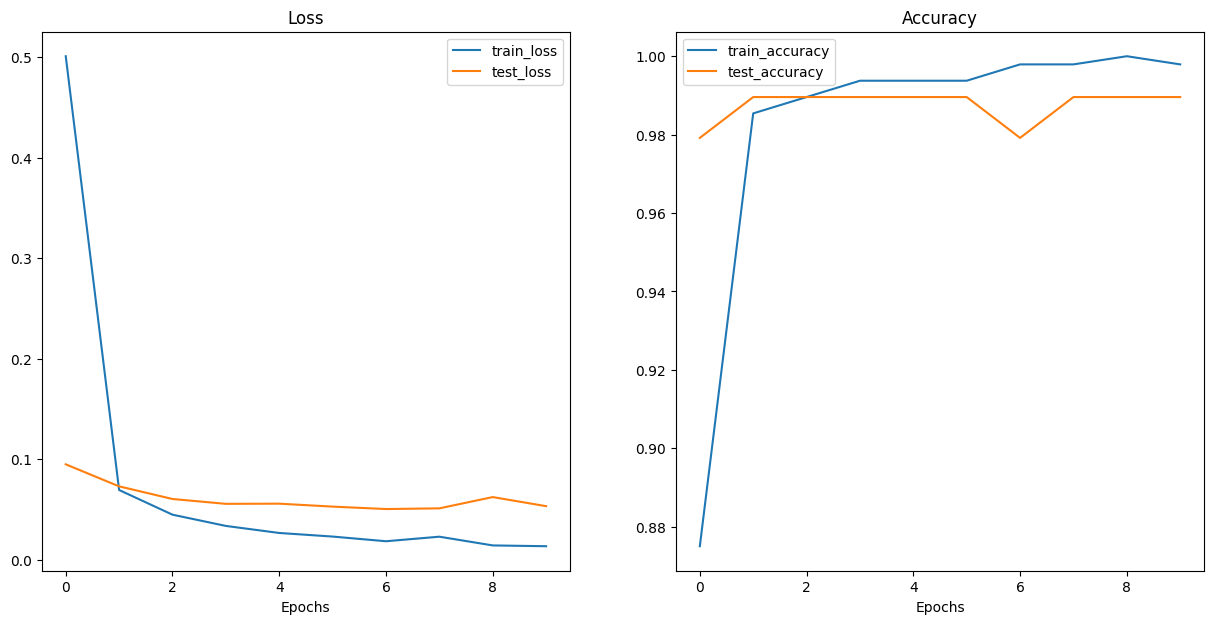

In [17]:
import torch
from torch import nn
from torch.optim import Adam
from torchvision import transforms, models
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchinfo import summary
from helper_functions import download_data, set_seeds, plot_loss_curves
from going_modular.going_modular import engine

# Установка семян для воспроизводимости
set_seeds()

# Скачивание и подготовка данных
data_20_percent_path = download_data(
    source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
    destination="pizza_steak_sushi_20_percent"
)
train_dir_20_percent = data_20_percent_path / "train"
test_dir = "data/pizza_steak_sushi/test"  # Путь к тестовому набору данных

# Загрузка предобученной модели ViT и весов с SWAG
vit_weights_swag = models.ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1
pretrained_vit_swag = models.vit_b_16(weights=vit_weights_swag)

# Заморозка всех слоёв предобученной модели
for param in pretrained_vit_swag.parameters():
    param.requires_grad = False

# Изменение выходного слоя модели
embedding_dim = 768  # Размер эмбеддингов для ViT_Base
pretrained_vit_swag.heads = nn.Sequential(
    nn.LayerNorm(normalized_shape=embedding_dim),
    nn.Linear(in_features=embedding_dim, out_features=3)  # Количество классов = 3 (пицца, стейк, суши)
)

# Вывод информации о модели
summary(model=pretrained_vit_swag,
        input_size=(1, 3, 384, 384),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

# Преобразование данных
vit_transforms_swag = vit_weights_swag.transforms()
train_dataset_20_percent = ImageFolder(root=train_dir_20_percent, transform=vit_transforms_swag)
test_dataset = ImageFolder(root=test_dir, transform=vit_transforms_swag)

train_dataloader_20_percent = DataLoader(train_dataset_20_percent, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Обучение модели
optimizer = Adam(params=pretrained_vit_swag.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_vit_swag.to(device)

set_seeds()
pretrained_vit_swag_results = engine.train(
    model=pretrained_vit_swag,
    train_dataloader=train_dataloader_20_percent,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=10,
    device=device
)

# Построение графиков потерь и точности
plot_loss_curves(pretrained_vit_swag_results)

print("Обучение завершено.")

# 5. Our custom ViT model architecture closely mimics that of the ViT paper, however, our training recipe misses a few things.
* Research some of the following topics from Table 3 in the ViT paper that we miss and write a sentence about each and how it might help with training:
    * **ImageNet-21k pretraining**
    * **Learning rate warmup**
    * **Learning rate decay**
    * **Gradient clipping**

Epoch [1/10], Loss: 1.0922
Test Loss: 1.0365, Test Accuracy: 40.67%
Epoch [2/10], Loss: 1.0024
Test Loss: 0.8863, Test Accuracy: 63.33%
Epoch [3/10], Loss: 0.8083
Test Loss: 0.6767, Test Accuracy: 87.33%
Epoch [4/10], Loss: 0.5839
Test Loss: 0.4607, Test Accuracy: 94.00%
Epoch [5/10], Loss: 0.3993
Test Loss: 0.2763, Test Accuracy: 99.33%
Epoch [6/10], Loss: 0.2347
Test Loss: 0.1530, Test Accuracy: 100.00%
Epoch [7/10], Loss: 0.1518
Test Loss: 0.0830, Test Accuracy: 100.00%
Epoch [8/10], Loss: 0.0926
Test Loss: 0.0488, Test Accuracy: 100.00%
Epoch [9/10], Loss: 0.0677
Test Loss: 0.0328, Test Accuracy: 100.00%
Epoch [10/10], Loss: 0.0521
Test Loss: 0.0246, Test Accuracy: 100.00%


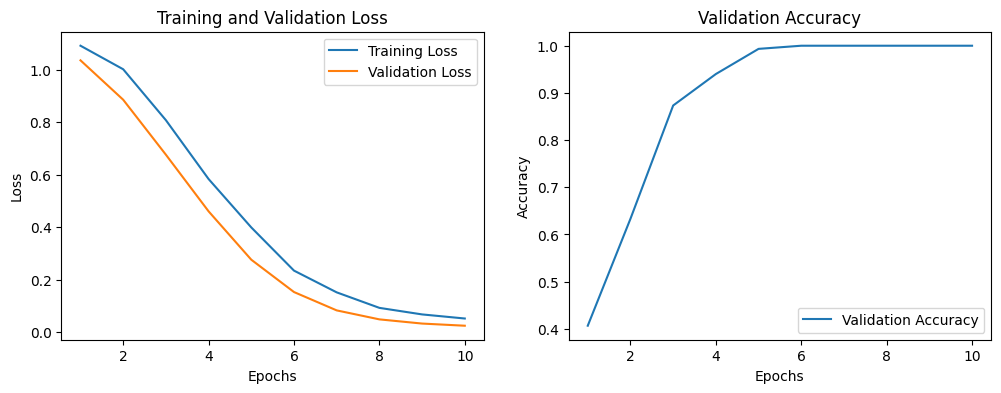

In [19]:
import torch
from torch import nn, optim
from torch.optim.lr_scheduler import LambdaLR
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as np
from pathlib import Path
import requests
import zipfile
import matplotlib.pyplot as plt


# Директории обучения и тестирования
train_dir = Path('/content/data/pizza_steak_sushi_20_percent/train')
test_dir = Path('/content/data/pizza_steak_sushi_20_percent/test')

# Трансформации для ViT
vit_weights_swag = models.ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1
vit_transforms = vit_weights_swag.transforms()

# Загрузчики данных
train_dataset = datasets.ImageFolder(root=train_dir, transform=vit_transforms)
test_dataset = datasets.ImageFolder(root=test_dir, transform=vit_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Загрузка предобученной модели ViT с весами ImageNet-21k SWAG
pretrained_vit_swag = models.vit_b_16(weights=vit_weights_swag)

# Замораживание всех слоев модели
for param in pretrained_vit_swag.parameters():
    param.requires_grad = False

# Обновление последнего слоя под наши классы
embedding_dim = 768  # для ViT_Base
num_classes = len(train_dataset.classes)
pretrained_vit_swag.heads = nn.Sequential(
    nn.LayerNorm(embedding_dim),
    nn.Linear(embedding_dim, num_classes)
)

# Устройство
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_vit_swag = pretrained_vit_swag.to(device)

# Оптимизатор и функция потерь
optimizer = optim.Adam(pretrained_vit_swag.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

# Warmup и learning rate decay
def lr_lambda(current_step: int):
    warmup_steps = 500
    if current_step < warmup_steps:
        return float(current_step) / float(max(1, warmup_steps))
    return max(0.0, float(10000 - current_step) / float(max(1, 10000 - warmup_steps)))

scheduler = LambdaLR(optimizer, lr_lambda)

# Обучающий цикл с gradient clipping
num_epochs = 10
max_grad_norm = 1.0

# Функции для обучения и оценки
def train(model, train_loader, test_loader, optimizer, loss_fn, scheduler, num_epochs, device):
    history = {'train_loss': [], 'test_loss': [], 'test_acc': []}
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for step, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)

            optimizer.step()
            scheduler.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        history['train_loss'].append(avg_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

        test_loss, test_acc = evaluate(model, test_loader, loss_fn, device)
        history['test_loss'].append(test_loss)
        history['test_acc'].append(test_acc)

    return history

def evaluate(model, data_loader, loss_fn, device):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(data_loader)
    accuracy = correct / len(data_loader.dataset)
    print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%")
    return avg_loss, accuracy

# Обучение модели
history = train(pretrained_vit_swag, train_loader, test_loader, optimizer, loss_fn, scheduler, num_epochs, device)

# Функция для отображения кривых обучения
def plot_loss_curves(history):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], label='Training Loss')
    plt.plot(epochs, history['test_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['test_acc'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.show()

# Отображение кривых обучения
plot_loss_curves(history)